Text(0.5, 1.0, 'Blobs')

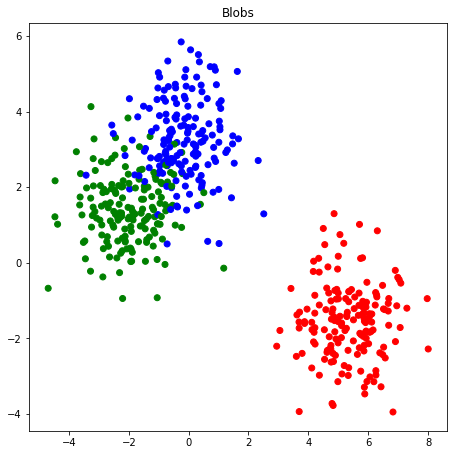

In [21]:
import numpy as np
from sklearn.datasets import make_blobs
blobs, classes = make_blobs(500,centers=3)

import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(figsize = (7.5,7.5))#fはfigure オブジェクト、axはAxesオブジェクトで同時に作成している。
rgb = np.array(['r','g','b'])
ax.scatter(blobs[:,0],blobs[:,1],color=rgb[classes])
ax.set_title("Blobs")

In [22]:
classes

array([2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2,
       0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0,
       1, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1,
       2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0,
       1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2,
       1, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 1,

In [ ]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)

In [3]:
kmean.fit(blobs)
kmean.cluster_centers_

array([[ 1.20784747, -8.54818478],
       [-5.71353848,  6.68917556],
       [ 9.4602643 ,  4.13791684]])

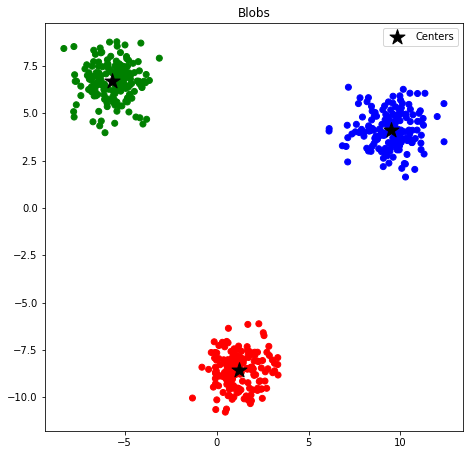

In [4]:
f, ax = plt.subplots(figsize=(7.5,7.5))
rgb = np.array(['r','g','b'])
ax.scatter(blobs[:,0],blobs[:,1],color=rgb[classes])
ax.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker='*',s=250,color='black',label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')#凡例を置く位置

In [5]:
kmean.labels_[:5]#データ5番目までの計算されたクラス

array([1, 1, 1, 2, 0], dtype=int32)

In [6]:
classes[:5]#データ5番目までの元々のクラス

array([1, 1, 1, 2, 0])

In [7]:
kmean.transform(blobs)[:5]#データ5番目までの３セントロイドまでのそれぞれの距離

array([[14.4880446 ,  2.73492394, 15.53341536],
       [17.08717816,  0.82493756, 14.96502878],
       [18.35186728,  1.61862911, 16.27239022],
       [16.02492339, 15.26077143,  1.04324968],
       [ 0.88591259, 17.39053874, 15.99464035]])

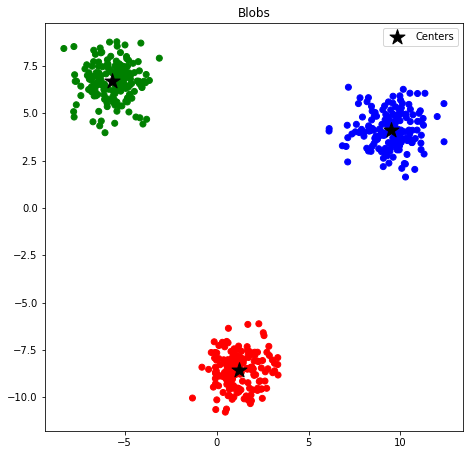

In [8]:
f, ax = plt.subplots(figsize=(7.5,7.5))
rgb = np.array(['r','g','b'])
ax.scatter(blobs[:,0],blobs[:,1],color=rgb[kmean.labels_])
ax.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker='*',s=250,color='black',label='Centers')
ax.set_title("Blobs")
ax.legend(loc='best')#凡例を置く位置

In [9]:
from sklearn import metrics
silhouette_samples = metrics.silhouette_samples(blobs,kmean.labels_)
np.column_stack((classes[:5],silhouette_samples[:5]))

array([[1.        , 0.79748591],
       [1.        , 0.90586683],
       [1.        , 0.88019869],
       [2.        , 0.89373204],
       [0.        , 0.9116492 ]])

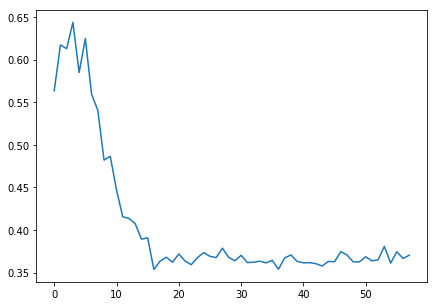

In [10]:
blobs,classes = make_blobs(500,centers=10)
silhouette_avgs = []
for k in range(2,60):
    kmean = KMeans(n_clusters=k).fit(blobs)
    silhouette_avgs.append(metrics.silhouette_score(blobs,kmean.labels_))
    
f, ax = plt.subplots(figsize = (7,5))
ax.plot(silhouette_avgs)

In [87]:
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline

blobs, ground_truth = datasets.make_blobs(1000,centers=3,cluster_std=1.75)

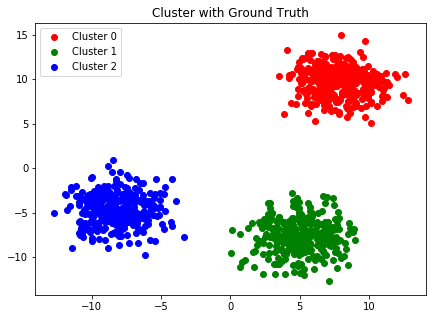

In [88]:
f, ax = plt.subplots(figsize=(7,5))
colors = ['r','g','b']
for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0],p[:,1],c=colors[i],label="Cluster {}".format(i))
    
ax.set_title("Cluster with Ground Truth")
ax.legend()

In [89]:
kmean = cluster.KMeans(n_clusters=3)
kmean.fit(blobs)
kmean.cluster_centers_

array([[ 7.83327033,  9.65876778],
       [-8.22145688, -4.66502625],
       [ 5.00065209, -7.64711663]])

Text(0.5, 1.0, 'Cluster with Ground Truth')

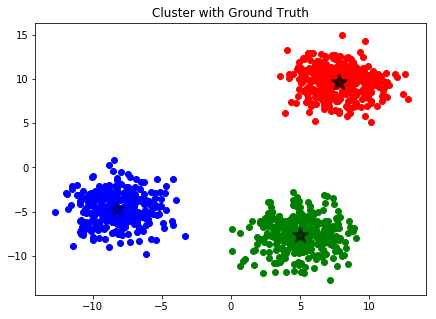

In [90]:
f, ax = plt.subplots(figsize=(7,5))
colors = ['r','g','b']
for i in range(3):
    p = blobs[ground_truth == i]
    ax.scatter(p[:,0],p[:,1],c=colors[i],label="Cluster {}".format(i))
    ax.scatter(kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1],marker='*',s=250,color='black',label='Centers',alpha=0.3,linewidth=2)
    
ax.set_title("Cluster with Ground Truth")

In [93]:
for i in range(3):
    print((kmean.labels_ == ground_truth)[ground_truth == i].astype(int).mean())

1.0
0.0
0.0


In [94]:
from sklearn import metrics
metrics.normalized_mutual_info_score(ground_truth,kmean.labels_)


/home/user/PycharmProjects/auto_encoder/venv/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


1.0

In [95]:
metrics.normalized_mutual_info_score(ground_truth,ground_truth)

/home/user/PycharmProjects/auto_encoder/venv/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


1.0

In [96]:
metrics.mutual_info_score(ground_truth,kmean.labels_)

1.0986112890009432

In [99]:
kmean.inertia_

6064.021034838113

In [100]:
blobs, labels = make_blobs(int(1e6),3)

In [101]:
from sklearn.cluster import KMeans, MiniBatchKMeans
kmeans = KMeans(n_clusters=3)
minibatch = MiniBatchKMeans(n_clusters=3)

In [102]:
%time kmeans.fit(blobs)

CPU times: user 6.26 s, sys: 9.89 s, total: 16.2 s
Wall time: 2.35 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
%time minibatch.fit(blobs)

CPU times: user 2.06 s, sys: 0 ns, total: 2.06 s
Wall time: 2.06 s


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=3, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [105]:
kmeans.cluster_centers_

array([[-0.56176336,  0.91901131,  9.91996881],
       [-0.61390567, -1.53767963, -6.69288152],
       [-5.88276105,  6.86668216,  1.79478531]])

In [114]:
minibatch.cluster_centers_

array([[-5.88074825,  6.86772488,  1.79723388],
       [-0.6153066 , -1.53423715, -6.68550016],
       [-0.56037047,  0.92050895,  9.92088929]])

In [11]:
import numpy as np
from sklearn.metrics import pairwise
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
pairwise.paired_distances(kmeans.cluster_centers_[0].reshape(1,-1),minibatch.cluster_centers_[2].reshape(1,-1))

NameError: name 'kmeans' is not defined

In [12]:
pairwise.paired_distances(kmeans.cluster_centers_,minibatch.cluster_centers_)

NameError: name 'kmeans' is not defined

In [13]:
points, labels = make_blobs()

In [14]:
distances = pairwise.pairwise_distances(points)


In [15]:
np.diag(distances)[:5]

array([0., 0., 0., 0., 0.])

In [16]:
distances[0][:5]

array([ 0.        , 17.52648796, 17.15343435, 14.34760624, 14.88661261])

In [17]:
ranks = np.argsort(distances[0])

In [18]:
ranks[:5]

array([ 0, 28, 98, 45, 80])

In [19]:
points[ranks][:5]
sp_points = points[ranks][:5]

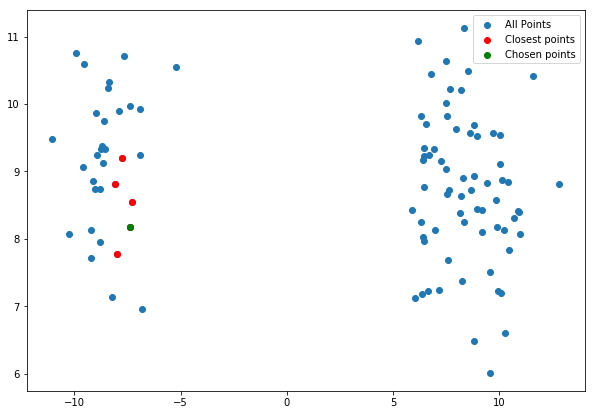

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(points[:,0],points[:,1],label='All Points')
plt.scatter(sp_points[:,0],sp_points[:,1],color = 'red',label='Closest points')
plt.scatter(points[0,0],points[0,1],color = 'green',label='Chosen points')
plt.legend()